# Homework 12: Linear Regression


**Reading**: 
* [Prediction](https://www.inferentialthinking.com/chapters/15/prediction.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 12 is due **Thursday 11/21 01:59 PM** before the class.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
from client.api.notebook import Notebook
ok = Notebook('hw12.ok')
try:
    _ = ok.auth(inline=True)
except:
    _ = ok.auth(inline=True, force=True)

Assignment: Homework 12: Linear Regression
OK, version v1.14.15

Successfully logged in as togden1@binghamton.edu


## 1. Triple Jump Distances vs. Vertical Jump Heights


Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (a horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill level in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data.

In [3]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


#### Question 1
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows the regression line**. 

See the documentation on `scatter` [here](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

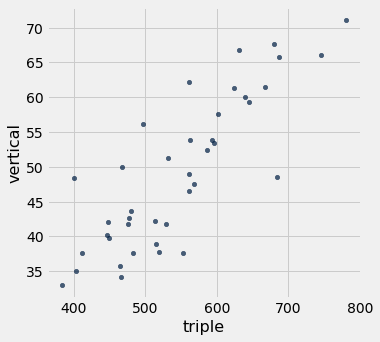

In [4]:
jumps.scatter('triple','vertical')

#### Question 2
Without doing any calculation, does the correlation coefficient `r` look closest to 0, .5, or -.5? Explain. 

.5, because on average, when the triple value increases, vertical also increases.

#### Question 3
Create a function called `regression_parameters`. It takes as its argument a table with two columns.  The first column is the x-axis, and the second column is the y-axis.  It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line. You should be able to find codes to calculate these quantities in lecture demo files or on the online textbook.

In [7]:
def regression_parameters(t):
    stand_x = [(val - np.mean(t.column('triple')))/np.std(t.column('triple')) for val in t.column('triple')]
    stand_y = [(val - np.mean(t.column('vertical')))/np.std(t.column('vertical')) for val in t.column('vertical')]
    r = np.mean(np.multiply(stand_x,stand_y))
    slope = r*(np.std(stand_y)/np.std(stand_x))
    intercept = np.mean(stand_y) - slope*np.mean(stand_x)
    return make_array(r, slope, intercept)

# When your function is finished, the next lines should
# compute the regression line predicting vertical jump 
# distances from triple jump distances. Set parameters
# to be the result of calling regression_parameters appropriately.
parameters = regression_parameters(jumps)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837598 ; slope: 0.8343076972837596 ; intercept: -6.62239474123433e-17


In [8]:
_ = ok.grade('q1_3')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/jYK4OY
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4
Let's use `parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be? Write a code, using values in `parameters`, to calulate the prediction, and assign it to `triple_record_vert_est`.

**Hint:** Make sure to convert from meters to centimeters!

In [20]:
triple_record_vert_est = parameters[1] * 182.9 + parameters[2]
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 152.594878 centimeters


In [21]:
_ = ok.grade('q1_4')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/MZAzoR
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 5
Do you expect this estimate to be accurate within a few centimeters? Why or why not?

*Hint:* Compare Edwards' triple jump distance to the triple jump distances in `jumps`. Is it relatively similar to the rest of the data? 

No, there is too much noise in the data.

## 2. Cryptocurrencies


Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable cryptocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attached to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** Below, we [load](https://www.kaggle.com/jessevent/all-crypto-currencies/data) two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [22]:
btc = Table.read_table('btc.csv')
btc

date,open,close,market,day
2015-09-29,239.02,236.69,3505090000,1
2015-09-30,236.64,236.06,3471280000,2
2015-10-01,236,237.55,3462800000,3
2015-10-02,237.26,237.29,3482190000,4
2015-10-03,237.2,238.73,3482100000,5
2015-10-04,238.53,238.26,3502460000,6
2015-10-05,238.15,240.38,3497740000,7
2015-10-06,240.36,246.06,3531230000,8
2015-10-07,246.17,242.97,3617400000,9
2015-10-08,243.07,242.3,3572730000,10


In [23]:
eth = Table.read_table('eth.csv')
eth

date,open,close,market,day
2015-09-29,0.579414,0.661146,42607700,1
2015-09-30,0.661192,0.738644,48636600,2
2015-10-01,0.734307,0.690215,54032300,3
2015-10-02,0.683732,0.678574,50328700,4
2015-10-03,0.678783,0.687171,49981900,5
2015-10-04,0.686343,0.668379,50556000,6
2015-10-05,0.666784,0.628643,49131600,7
2015-10-06,0.622218,0.650645,45863300,8
2015-10-07,0.650515,0.609388,47964700,9
2015-10-08,0.609501,0.621716,44955900,10


#### Question 1

In the cell below, make one or two plots to investigate the opening prices of BTC and ETH as functions of time (price on the y-axis and time on the x-axis). Then comment on whether you think the values roughly move together.

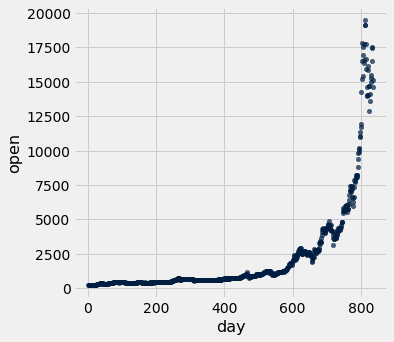

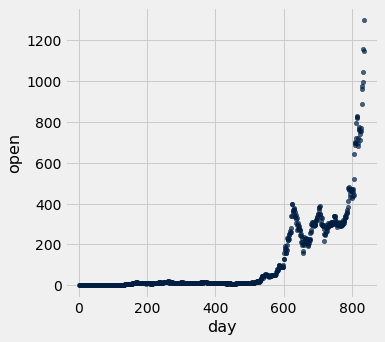

In [24]:
btc.scatter('day','open')
eth.scatter('day','open')

Yes, you can fairly accurately predict the price of one with the other.

#### Question 2

Now, calculate the correlation coefficient between the opening prices of BTC and ETH.

*Hint:* It may be helpful to define and use the function `std_units`. You can find the code in lecture demo files or the textbook.

In [30]:
def std_units(arr): 
    return [(val - np.mean(arr)) for val in arr]/np.std(arr)

standard_btc = std_units(btc['open'])
standard_eth = std_units(eth['open'])

r = np.mean(np.multiply(standard_btc,standard_eth))
r

0.9250325764148278

In [31]:
_ = ok.grade('q2_2')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/16NA3G
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



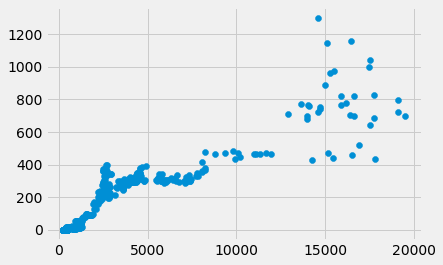

In [33]:
plt.scatter(btc['open'],eth['open'])

#### Question 3
Regardless of your conclusions above, write a function `eth_predictor` which takes an opening BTC price and returns the predicted price of ETH. Again, it will be helpful to use the function `regression_parameters` that you defined earlier in this homework, since it should be able to do most of the work for you.

**Note:** Make sure that your `eth_predictor` is using linear regression.

In [38]:
def eth_predictor(btc_price):
    parameters = regression_parameters(Table().with_columns('triple',btc['open'],'vertical',eth['open']))
    slope = parameters[1]
    intercept = parameters[2]
    return slope * btc_price + intercept

In [39]:
_ = ok.grade('q2_3')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/ywyg2R
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4

Now, using the `eth_predictor` you defined in the previous question, make a prediction to every row in the data. Then make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices should be different from the color for the predicted ETH prices.

Hints:
* An example of such a scatter plot is generated <a href= "https://www.inferentialthinking.com/chapters/15/2/regression-line.html
"> here. </a>
* Think about the table that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present in this table? Also, what should each row represent? Constructing the table will be the main part of this question; once you have this table, generating the scatter plot should be straightforward as usual.

In [43]:
eth_hat = [eth_predictor(btc_price) for btc_price in std_units(btc['open'])]

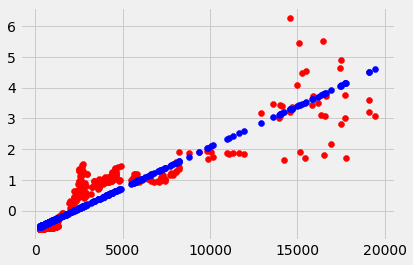

In [44]:
plt.scatter(btc['open'],std_units(eth['open']),c='r')
plt.scatter(btc['open'],eth_hat,c='b')

#### Question 5
Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable?

No, because it is not a simple linear correlation.

#### Question 6

Now suppose you want to go the other way: to predict a BTC  price given an ETH price. What would the regression parameters of this linear model be? How do they compare to the regression parameters from the model where you were predicting ETH price given a BTC price? Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `regression_parameters` changes when switching BTC and ETH as $x$ and $y$. For example, if r changes, the slope changes, but the intercept wouldn't change, the array would be `[True, True, False]`

In [45]:
regression_changes = [True, True, False]
regression_changes

[True, True, False]

In [46]:
_ = ok.grade('q2_6')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/x6x4yl
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## 3. Evaluating NBA Game Predictions


#### A brief introduction to sports betting

In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team," and the other team is called the "away team."  The winner is the team with more points.

We can summarize what happened in a game by the "**outcome**", defined as the **the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won. 

In order to facilitate betting on games, analysts at casinos try to predict the outcome of the game. This prediction of the outcome is called the **spread.**

When the spread is not an integer, but equals to, for example, 2.5, it does not mean that the analyst believes that the actual outcome will be 2.5. It simply means that he strongly believes the outcome will be either 2 or 3, and it is hard for him to distinguish between these two outcomes.


In [47]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


For example, read the second row: before the game, the casinos had predicted the outcome to be -13 (away team will lose to the home by a difference of 13); but then the actual outcome turned out to be -5 (away loses with a difference of 5 only.)

Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis. Note that although we usually plot the regression prediction on the y-axis, here we deliberately plot the spread on the x-axis because it is not a regression prediction.

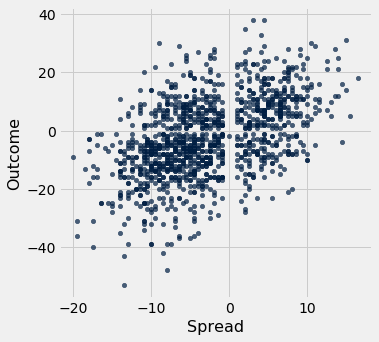

In [48]:
spreads.scatter("Spread", "Outcome")

#### Question 1
Why do you think that the spread and outcome are never 0 (except for 1 case of the spread being 0)? 

**Hint:** Read the first paragraph of the Wikipedia article on basketball [here](https://en.wikipedia.org/wiki/Basketball) if you're confused!

If there is a tie, it goes into overtime.

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games with that spread value equal to this spread value? If not, the casino would apparently be making a systematic error in its predictions.

#### Question 2
Among games with a spread between 3.5 and 6.5 (including both 3.5 and 6.5), what was the average outcome? 

*Hint:* Read the documentation for the predicate `are.between_or_equal_to` [here](http://data8.org/datascience/predicates.html#datascience.predicates.are.between_or_equal_to).

In [50]:
spreads_around_5 = spreads.where('Spread',are.between_or_equal_to(3.5,6.5))
spread_5_outcome_average = np.mean(spreads_around_5['Spread'])
print("Average outcome for spreads around 5:", spread_5_outcome_average)

Average outcome for spreads around 5: 4.955882352941177


In [51]:
_ = ok.grade('q3_2')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/574GMY
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 3
**_If_** the average outcome for games with any given spread turned out to be **exactly** equal to that spread, what would the slope and intercept of the linear regression line be, in original units? Hint: If you're stuck, try drawing a picture!

In [52]:
expected_slope_for_equal_spread = 1
expected_intercept_for_equal_spread = 0

In [53]:
_ = ok.grade('q3_3')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/gpE4yr
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4
The `standard_units` function below is incorrect. Fix it.  It should take an array of numbers as its argument and return an array of those numbers in standard units.

In [54]:
def standard_units(nums):
    """Return an array where every value in nums is converted to standard units."""
    return (nums-np.mean(nums))/np.std(nums)

In [55]:
_ = ok.grade('q3_4')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/oZl4KY
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 5
Compute the correlation coefficient between outcomes and spreads. 

**Note:** It might be helpful to use the `standard_units` function.

In [58]:
spread_r = np.mean(standard_units(spreads['Outcome'])*standard_units(spreads['Spread']))
spread_r

0.49181413688314235

In [59]:
_ = ok.grade('q3_5')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/MZAzgm
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 6
Compute the slope of the least-squares linear regression line that predicts outcomes from spreads, in original units.

In [60]:
spread_slope = spread_r * (np.std(standard_units(spreads['Outcome']))/np.std(standard_units(spreads['Spread'])))
spread_slope

0.49181413688314235

In [61]:
_ = ok.grade('q3_6')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Backup... 100% complete
Backup successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/hw12/backups/16NAqZ
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [62]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Submit... 0.0% complete
Could not submit: Late Submission of bu/math247-cs207/fa19/hw12



In [63]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t